In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mogli
import os
from ipywidgets import IntProgress
from IPython.display import display, clear_output


In [3]:
bandgaps = np.loadtxt('Datasets/bandgaps.csv')
cods = np.loadtxt('Datasets/CODids.csv', dtype=int)
materials = mogli.read('Datasets/structures.xyz')


# array with point of sphere  in 3D space

def sphere(radius, n):
    phi = np.linspace(0, np.pi, n)
    theta = np.linspace(0, 2*np.pi, n)
    x = radius*np.outer(np.sin(phi), np.cos(theta))
    y = radius*np.outer(np.sin(phi), np.sin(theta))
    z = radius*np.outer(np.cos(phi), np.ones_like(theta))
    # put x,y, and z as columns in a matrix
    
    return np.column_stack((x.flatten(),y.flatten(),z.flatten()))

s = sphere(100, 10)

plt.figure(figsize=(10,10))

# make a 3d plot
ax = plt.axes(projection='3d')

# Data for a three-dimensional line

ax.plot3D(s[:,0], s[:,1], s[:,2], 'o')
ax.plot3D(0,0,0, 'red', marker='o')

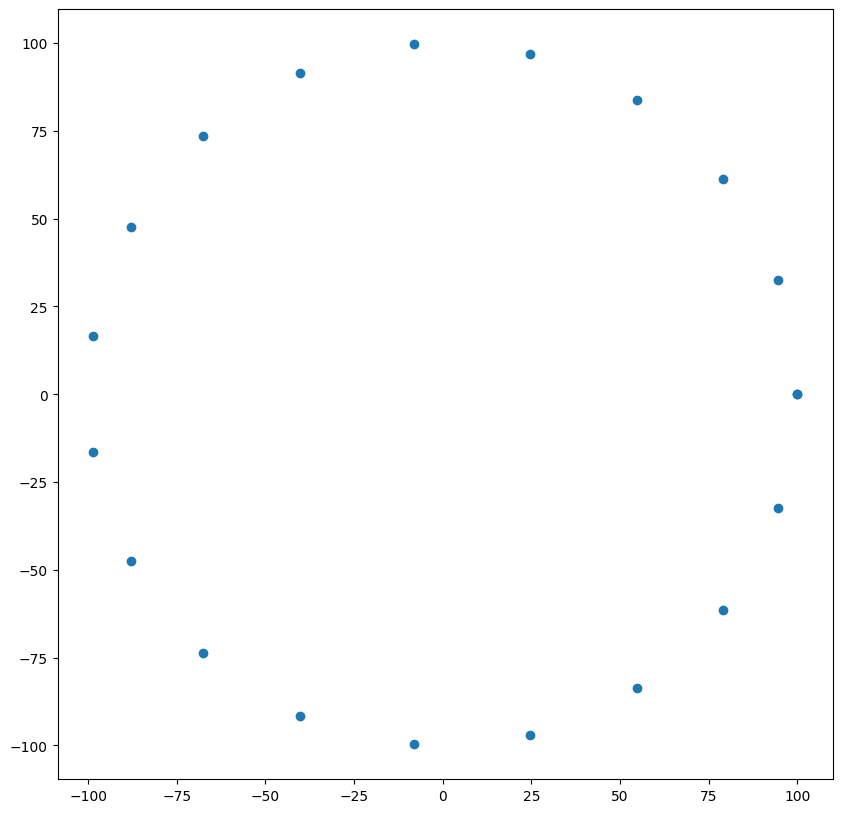

In [4]:
def circle(radius, n):
    theta = np.linspace(0, 2*np.pi, n)
    x = radius*np.cos(theta)
    y = radius*np.sin(theta)
    z = np.zeros_like(theta)
    # put x,y, and z as columns in a matrix
    
    return np.column_stack((x.flatten(),y.flatten(),z.flatten()))
x = circle(100, 20)

plt.figure(figsize=(10,10))
plt.plot(x[:,0], x[:,1], 'o')

In [16]:
bonds_param = 1.55
width = 512
height = 512
distance = 25

path = f'Datasets/3d/{width}x{height}_BP{bonds_param}/'
if not os.path.exists(path):
    os.makedirs(path)    
for i, molecule in enumerate(materials):
    pathmolecule = f'{path}/{i}'
    if not os.path.exists(pathmolecule):
        os.makedirs(pathmolecule)   
    for z in range(5):
        for n,rotation in enumerate(circle(distance, 10)):   
            s  = (rotation[0],rotation[1],z)    
            mogli.export(molecule,f"{pathmolecule}/molecula_x_{i}_{n}_{rotation[0]}_{rotation[1]}_{z}.jpg",bonds_param=bonds_param,camera=((rotation[0],rotation[1],z),(0, 0, 0),(0 , 0 , 1)), width=width, height=height)
    # for n,rotation in enumerate(circle(distance, 20)):
    #     mogli.export(molecule,f"{path}/molecula_y_{i}_{n}.jpg",bonds_param=bonds_param,camera=((rotation[0],0,rotation[1]),(0, 0, 0),(0 , 0 , 1)), width=width, height=height)
    # for n,rotation in enumerate(sphere(distance, 20)):
    #     mogli.export(molecule,f"{path}/molecula_s_{i}_{n}.jpg",bonds_param=bonds_param,camera=((rotation[0],0,rotation[1]),(0, 0, 0),(0 , 0 , 1)), width=width, height=height)
    clear_output(wait=True)    
    ! python colmap2nerf.py --colmap_matcher exhaustive --run_colmap --aabb_scale 32 --images {pathmolecule} --out {pathmolecule}/nerf.json --overwrite
    break
    if i%10 == 0:
        
        break

running colmap with:
	db=colmap.db
	images="Datasets/3d/512x512_BP1.55//0"
	sparse=colmap_sparse
	text=colmap_text
==== running: colmap feature_extractor --ImageReader.camera_model OPENCV --ImageReader.camera_params "" --SiftExtraction.estimate_affine_shape=true --SiftExtraction.domain_size_pooling=true --ImageReader.single_camera 1 --database_path colmap.db --image_path "Datasets/3d/512x512_BP1.55//0"

Feature extraction

Processed file [1/50]
  Name:            molecula_x_0_0_25.0_0.0_0.jpg
  Dimensions:      512 x 512
  Camera:          #1 - OPENCV
  Focal Length:    614.40px
  Features:        250
Processed file [2/50]
  Name:            molecula_x_0_2_4.34120444167326_24.6201938253052_1.jpg
  Dimensions:      512 x 512
  Camera:          #1 - OPENCV
  Focal Length:    614.40px
  Features:        221
Processed file [3/50]
  Name:            molecula_x_0_0_25.0_0.0_1.jpg
  Dimensions:      512 x 512
  Camera:          #1 - OPENCV
  Focal Length:    614.40px
  Features:        250
Pr

ERROR: failed to create sparse model




Initializing with image pair #7 and #10


Global bundle adjustment

iter      cost      cost_change  |gradient|   |step|    tr_ratio  tr_radius  ls_iter  iter_time  total_time
   0  9.594913e+01    0.00e+00    8.30e+02   0.00e+00   0.00e+00  1.00e+04        0    3.39e-04    7.23e-04
   1  1.312203e+03   -1.22e+03    8.30e+02   1.41e+02  -4.58e+01  5.00e+03        1    3.57e-04    1.11e-03
   2  3.112808e+02   -2.15e+02    8.30e+02   9.53e+01  -1.07e+01  1.25e+03        1    1.68e-04    1.29e-03
   3  9.084314e+01    5.11e+00    1.19e+03   3.23e+01   6.28e-01  1.27e+03        1    4.44e-04    1.75e-03
   4  8.331330e+01    7.53e+00    9.21e+02   2.72e+01   8.19e-01  1.72e+03        1    4.67e-04    2.23e-03
   5  8.020547e+01    3.11e+00    1.59e+03   3.37e+01   3.31e-01  1.65e+03        1    4.57e-04    2.70e-03
   6  7.237903e+01    7.83e+00    1.33e+03   2.77e+01   6.39e-01  1.69e+03        1    4.64e-04    3.18e-03
   7  6.695841e+01    5.42e+00    1.19e+03   2.49e+01   5.86e-01  

In [4]:
import  colmap2nerf

In [ ]:
mogli.export(molecule,f"{path}/enfrente_{i}.html",bonds_param=bonds_param,camera=((distance, 0, 0),(0, 0, 0),(0 , 1 , 0)), width=width, height=height)


In [ ]:
bonds_param = 1.55
width = 512
height = 512
distance = 25

path = f'Datasets/3d/{width}x{height}_BP{bonds_param}/f1'
if not os.path.exists(path):
    os.makedirs(path)    
for i, molecule in enumerate(materials):
    for n,rotation in enumerate(sphere(distance, 10)):
        mogli.export(molecule,f"{path}/enfrente_{i}.jpg",bonds_param=bonds_param,camera=((distance, 0, 0),(0, 0, 0),(0 , 1 , 0)), width=width, height=height)
        # atras
        mogli.export(molecule,f"{path}/atras_{i}.jpg",bonds_param=bonds_param,camera=((-distance, 0, 0),(0, 0, 0),(0, 1 , 0)), width=width, height=height)

        # 90 grados derecha 
        mogli.export(molecule,f"{path}/Izquierda_{i}.jpg",bonds_param=bonds_param,camera=((0, 0, distance),(0, 0, 0),(0,1, 0)), width=width, height=height)
        # 90 grados izquierda
        mogli.export(molecule,f"{path}/Derecha_{i}.jpg",bonds_param=bonds_param,camera=((0, 0, distance),(0, 0, 0),(0, -1, 0)), width=width, height=height)

        # abajo
        mogli.export(molecule,f"{path}/abajo_{i}.jpg",bonds_param=bonds_param,camera=((0, -distance, 0),(0, 0, 0),(1, 0, 0)), width=width, height=height)
        # arriba
        mogli.export(molecule,f"{path}/arriba_{i}.jpg",bonds_param=bonds_param,camera=((0, distance, 0),(0, 0, 0),(-1, 0, 0)), width=width, height=height)
            
        break
    break

In [ ]:
bonds_param = 1.25
width = 512
height = 512

path = f'Datasets/3d/{width}x{height}_BP{bonds_param}'
print(path)


distance = 25

if not os.path.exists(path):
    os.makedirs(path)    
if not os.path.exists(f"{path}/enfrente"):
    os.makedirs(f"{path}/enfrente")
if not os.path.exists(f"{path}/atras"):
    os.makedirs(f"{path}/atras")
if not os.path.exists(f"{path}/Izquierda"):
    os.makedirs(f"{path}/Izquierda")
if not os.path.exists(f"{path}/Derecha"):
    os.makedirs(f"{path}/Derecha")
if not os.path.exists(f"{path}/abajo"):
    os.makedirs(f"{path}/abajo")
if not os.path.exists(f"{path}/arriba"):
    os.makedirs(f"{path}/arriba")    

f = IntProgress(min=0, max=len(materials)) 

f.description = 'Progress: '
f.bar_style = 'info'
f.layout.width = '100%'
display(f)

for i, molecule in enumerate(materials):
    # frente 
    mogli.export(molecule,f"{path}/enfrente/enfrente_{i}.png",bonds_param=bonds_param,camera=((distance, 0, 0),(0, 0, 0),(0 , 1 , 0)), width=width, height=height)
    # atras
    mogli.export(molecule,f"{path}/atras/atras_{i}.png",bonds_param=bonds_param,camera=((-distance, 0, 0),(0, 0, 0),(0, 1 , 0)), width=width, height=height)

    # 90 grados derecha 
    mogli.export(molecule,f"{path}/Izquierda/Izquierda_{i}.png",bonds_param=bonds_param,camera=((0, 0, distance),(0, 0, 0),(0,1, 0)), width=width, height=height)
    # 90 grados izquierda
    mogli.export(molecule,f"{path}/Derecha/Derecha_{i}.png",bonds_param=bonds_param,camera=((0, 0, distance),(0, 0, 0),(0, -1, 0)), width=width, height=height)

    # abajo
    mogli.export(molecule,f"{path}/abajo/abajo_{i}.png",bonds_param=bonds_param,camera=((0, -distance, 0),(0, 0, 0),(1, 0, 0)), width=width, height=height)
    # arriba
    mogli.export(molecule,f"{path}/arriba/arriba_{i}.png",bonds_param=bonds_param,camera=((0, distance, 0),(0, 0, 0),(-1, 0, 0)), width=width, height=height)
    f.value += 1

In [ ]:
bonds_param = 1.75
width = 512
height = 512

path = f'Datasets/3d/{width}x{height}_BP{bonds_param}'
print(path)


distance = 25

if not os.path.exists(path):
    os.makedirs(path)    
if not os.path.exists(f"{path}/enfrente"):
    os.makedirs(f"{path}/enfrente")
if not os.path.exists(f"{path}/atras"):
    os.makedirs(f"{path}/atras")
if not os.path.exists(f"{path}/Izquierda"):
    os.makedirs(f"{path}/Izquierda")
if not os.path.exists(f"{path}/Derecha"):
    os.makedirs(f"{path}/Derecha")
if not os.path.exists(f"{path}/abajo"):
    os.makedirs(f"{path}/abajo")
if not os.path.exists(f"{path}/arriba"):
    os.makedirs(f"{path}/arriba")    

f = IntProgress(min=0, max=len(materials)) 

f.description = 'Progress: '
f.bar_style = 'info'
f.layout.width = '100%'
display(f)

for i, molecule in enumerate(materials):
    # frente 
    mogli.export(molecule,f"{path}/enfrente/enfrente_{i}.png",bonds_param=bonds_param,camera=((distance, 0, 0),(0, 0, 0),(0 , 1 , 0)), width=width, height=height)
    # atras
    mogli.export(molecule,f"{path}/atras/atras_{i}.png",bonds_param=bonds_param,camera=((-distance, 0, 0),(0, 0, 0),(0, 1 , 0)), width=width, height=height)

    # 90 grados derecha 
    mogli.export(molecule,f"{path}/Izquierda/Izquierda_{i}.png",bonds_param=bonds_param,camera=((0, 0, distance),(0, 0, 0),(0,1, 0)), width=width, height=height)
    # 90 grados izquierda
    mogli.export(molecule,f"{path}/Derecha/Derecha_{i}.png",bonds_param=bonds_param,camera=((0, 0, distance),(0, 0, 0),(0, -1, 0)), width=width, height=height)

    # abajo
    mogli.export(molecule,f"{path}/abajo/abajo_{i}.png",bonds_param=bonds_param,camera=((0, -distance, 0),(0, 0, 0),(1, 0, 0)), width=width, height=height)
    # arriba
    mogli.export(molecule,f"{path}/arriba/arriba_{i}.png",bonds_param=bonds_param,camera=((0, distance, 0),(0, 0, 0),(-1, 0, 0)), width=width, height=height)
    f.value += 1

In [ ]:
bonds_param = 1.25
width = 512
height = 512

path = f'Datasets/3d/{width}x{height}_BP{bonds_param}'
print(path)


distance = 25

if not os.path.exists(path):
    os.makedirs(path)    
if not os.path.exists(f"{path}/enfrente"):
    os.makedirs(f"{path}/enfrente")
if not os.path.exists(f"{path}/atras"):
    os.makedirs(f"{path}/atras")
if not os.path.exists(f"{path}/Izquierda"):
    os.makedirs(f"{path}/Izquierda")
if not os.path.exists(f"{path}/Derecha"):
    os.makedirs(f"{path}/Derecha")
if not os.path.exists(f"{path}/abajo"):
    os.makedirs(f"{path}/abajo")
if not os.path.exists(f"{path}/arriba"):
    os.makedirs(f"{path}/arriba")    

f = IntProgress(min=0, max=len(materials)) 

f.description = 'Progress: '
f.bar_style = 'info'
f.layout.width = '100%'
display(f)

for i, molecule in enumerate(materials):
    # frente 
    mogli.export(molecule,f"{path}/enfrente/enfrente_{i}.png",bonds_param=bonds_param,camera=((distance, 0, 0),(0, 0, 0),(0 , 1 , 0)), width=width, height=height)
    # atras
    mogli.export(molecule,f"{path}/atras/atras_{i}.png",bonds_param=bonds_param,camera=((-distance, 0, 0),(0, 0, 0),(0, 1 , 0)), width=width, height=height)

    # 90 grados derecha 
    mogli.export(molecule,f"{path}/Izquierda/Izquierda_{i}.png",bonds_param=bonds_param,camera=((0, 0, distance),(0, 0, 0),(0,1, 0)), width=width, height=height)
    # 90 grados izquierda
    mogli.export(molecule,f"{path}/Derecha/Derecha_{i}.png",bonds_param=bonds_param,camera=((0, 0, distance),(0, 0, 0),(0, -1, 0)), width=width, height=height)

    # abajo
    mogli.export(molecule,f"{path}/abajo/abajo_{i}.png",bonds_param=bonds_param,camera=((0, -distance, 0),(0, 0, 0),(1, 0, 0)), width=width, height=height)
    # arriba
    mogli.export(molecule,f"{path}/arriba/arriba_{i}.png",bonds_param=bonds_param,camera=((0, distance, 0),(0, 0, 0),(-1, 0, 0)), width=width, height=height)
    f.value += 1